## Firstly, I am trying to figure out how to use Dan Foreman Mackey's "exoplanet" library, so lets try it out.
### Link to the library: https://docs.exoplanet.codes/en/latest/

### I have literally no idea where to begin :::- Date: 15 dec--2021
#### I am trying to learn from: https://docs.exoplanet.codes/en/latest/tutorials/data-and-models/#orbital-conventions

In [1]:
## Lets Bring some library
import matplotlib.pyplot as plt
import exoplanet as xo
import numpy as np
import scipy.stats as ss
## I guess this will be enough

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
##Lets try to define orbit for a body!! apparently exoplanet has a funtion for this. Trying it supposedly for 
#something like earth
orbit=xo.orbits.KeplerianOrbit(period = 365.0, #in days
                               t0 = 0, # I do not this value but I guess for earth it would be 0
                               incl = 0.37 * np.pi, # I googled inclination of Earth and came up with this - Maybe I am wrong, If so, please mail me and tell what is wrong!!!
                               ecc = 0.0167, # I googles this one for earth
                               omega = 1.9933026, #I do not know dude I am googling this value, so ever if you read and it is wrong mail me
                               Omega = 6.08665006,
                               m_planet=0.000003)

Text(0, 0.5, 'time [days]')

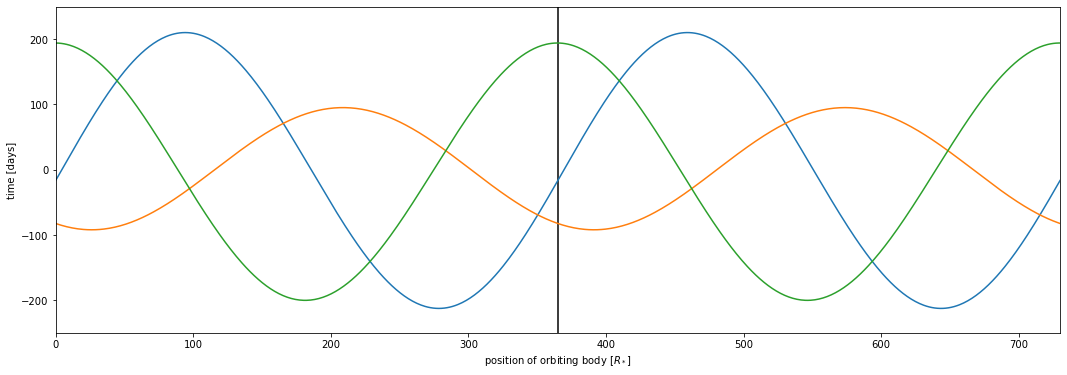

In [55]:
## Let see what mess we have made in a plot, so after that we will have idea whether values we gave makes some sense
## we will plot position and velocity as a function of time so lets define time
t=np.linspace(0,730,730)
x, y, z =orbit.get_relative_position(t)
vx, vy, vz =orbit.get_relative_velocity(t)

## So Congratzzzzz!!!! you have got position and velocity for Earth - I guess
## Lets plot time versus Position
plt.figure(figsize=(18,6))
plt.vlines(x=365, ymin=-250,ymax=250, colors= 'black')
plt.ylim(-250,250)
plt.xlim(0,730)
plt.plot(t, x.eval())
plt.plot(t, y.eval())
plt.plot(t, z.eval())
plt.xlabel("position of orbiting body [$R_*$]")
plt.ylabel("time [days]")
##It is just me or everyone is seeing symetry accross the black line - its seems to be because we have assigned orbital period to be 365

Text(0, 0.5, 'time [days]')

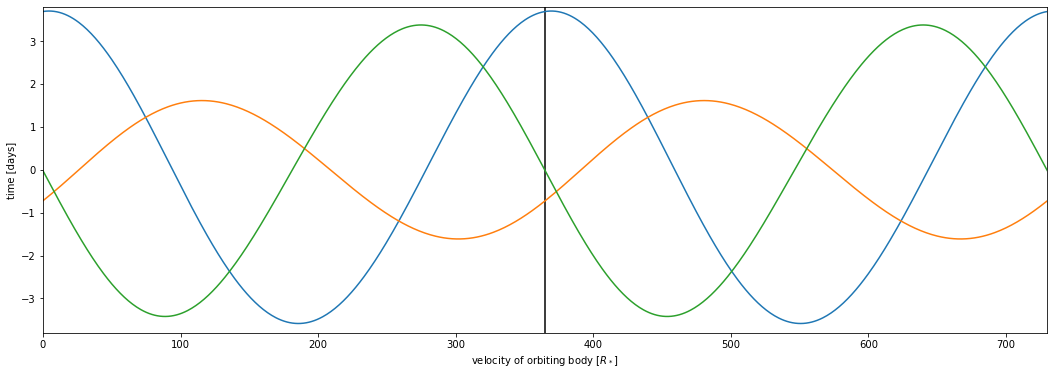

In [56]:
#Lets do it for velocity now 
plt.figure(figsize=(18,6))
plt.vlines(x=365, ymin=-4,ymax=4, colors= 'black')
plt.ylim(-3.8,3.8)
plt.xlim(0,730)
plt.plot(t, vx.eval())
plt.plot(t, vy.eval())
plt.plot(t, vz.eval())
plt.xlabel("velocity of orbiting body [$R_*$]")
plt.ylabel("time [days]")

## I am tired for today, so gonna read cosmology; lets end this one here. 